## EDA



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_train=pd.read_csv("/content/drive/MyDrive/CompLit/train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/CompLit/test.csv")

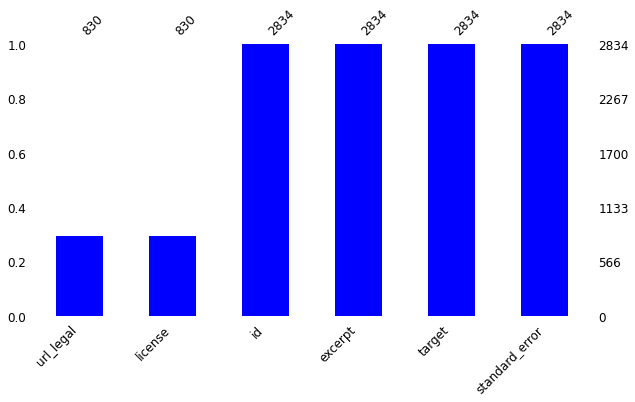

In [ ]:
# !pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df_train,color="blue", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

In [ ]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [ ]:
df_train.nunique()

id                2834
url_legal          667
license             15
excerpt           2834
target            2834
standard_error    2834
dtype: int64

In [ ]:
df_test.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [ ]:
df_test.nunique()

id           7
url_legal    3
license      2
excerpt      7
dtype: int64

# Lower Case Conversion, Tokenization, StopWord Removal and Lemmatization 
(Using one sample excerpt)

In [ ]:
import re
import nltk
# nltk.download('punkt')
from nltk.corpus import stopwords
excerpt1 = df_train['excerpt'].min()
print ("Initial Data in Dataset\n",excerpt1)

e = re.sub("[^a-zA-Z]", " ", excerpt1)
e = e.lower()
     
e = nltk.word_tokenize(e)
e = [word for word in e if not word in set(stopwords.words("english"))]
        
lemma = nltk.WordNetLemmatizer()
e = [lemma.lemmatize(word) for word in e]
e=" ".join(e)
print("\nFinal Data after pre proccessing: \n")
print(e)

Initial Data in Dataset
 "'Morning, Jeeves," I said.
"Good morning, sir," said Jeeves. He put the good old cup of tea softly on the table by my bed, and I took a refreshing sip. Just right, as usual. Not too hot, not too sweet, not too weak, not too strong, not too much milk, and not a drop spilled in the saucer. A most amazing cove, Jeeves. So dashed competent in every respect. I've said it before, and I'll say it again. I mean to say, take just one small instance. Every other valet I've ever had used to barge into my room in the morning while I was still asleep, causing much misery: but Jeeves seems to know when I'm awake by a sort of telepathy. He always floats in with the cup exactly two minutes after I come to life. Makes a deuce of a lot of difference to a fellow's day.
"How's the weather, Jeeves?" 
"Exceptionally clement, sir."
"Anything in the papers?"
"Some slight friction threatening in the Balkans, sir. Otherwise, nothing."
Final Data after pre proccessing: 

morning jeeves 

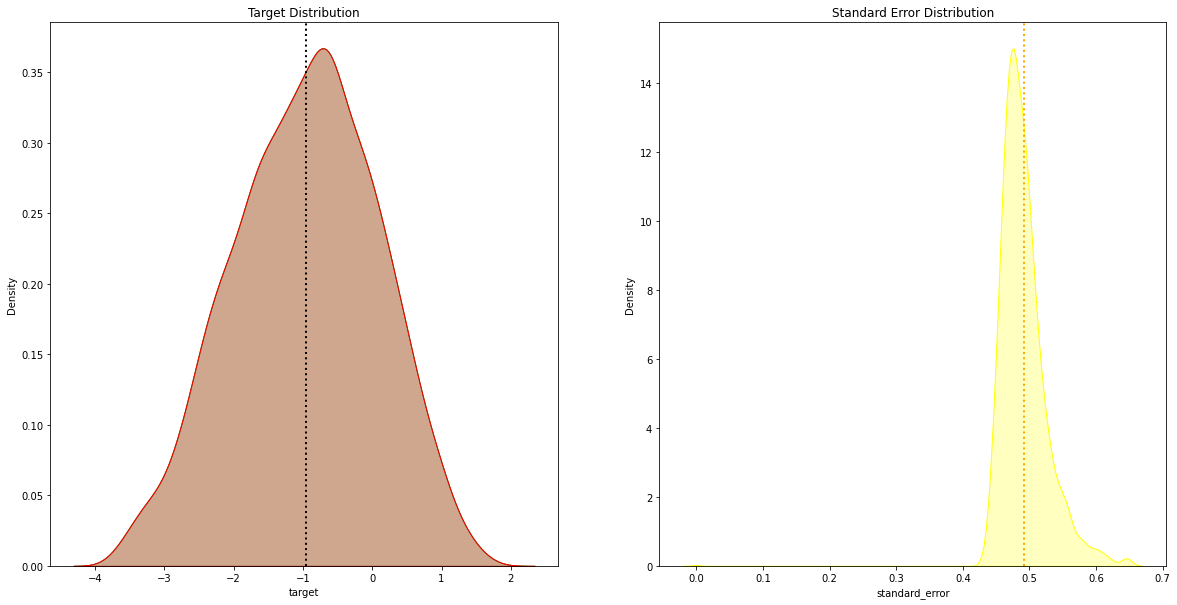

In [ ]:
import seaborn as sns
import numpy as np
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.kdeplot(df_train['target'], color="green", shade=True,ax=ax[0])
sns.kdeplot(df_train['target'], color="red", shade=True,ax=ax[0])
sns.kdeplot(df_train['standard_error'], color="yellow", shade=True,ax=ax[1])
ax[0].axvline(df_train['target'].mean(), color='black',linestyle=':', linewidth=2)
ax[1].axvline(df_train['standard_error'].mean(), color='orange',linestyle=':', linewidth=2)
ax[0].set_title("Target Distribution")
ax[1].set_title("Standard Error Distribution")
plt.show()

# Function to perform Preprocessing 


In [ ]:
def preprocess(data):
    excerpt_processed=[]
    for e in data['excerpt']:
        
        # find alphabets
        e = re.sub("[^a-zA-Z]", " ", e)
        
        # convert to lower case
        e = e.lower()
        
        # tokenize words
        e = nltk.word_tokenize(e)
        
        # remove stopwords
        e = [word for word in e if not word in set(stopwords.words("english"))]
        
        # lemmatization
        lemma = nltk.WordNetLemmatizer()
        e = [lemma.lemmatize(word) for word in e]
        e=" ".join(e)
        
        excerpt_processed.append(e)
        
    return excerpt_processed
df_train_prep=preprocess(df_train)

#Finding Unigram,Bigram and Trigram

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CV().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CV(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
def plot_bt(x,w,p):
    common_words = x(df_train_prep, 20)
    common_words_df = DataFrame (common_words,columns=['word','freq'])

    plt.figure(figsize=(16,8))
    sns.barplot(x='freq', y='word', data=common_words_df,facecolor=(0, 0, 0, 0),linewidth=3,edgecolor=sns.color_palette(p,20))
    plt.title("Top 20 "+ w,)
    plt.xlabel("Frequency", fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=45, fontsize=13)
    plt.ylabel("");
    return common_words_df

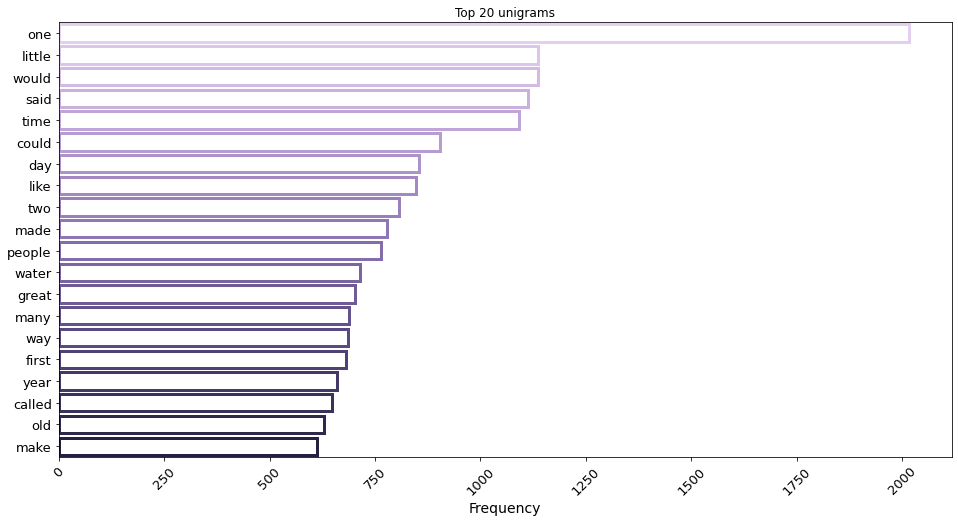

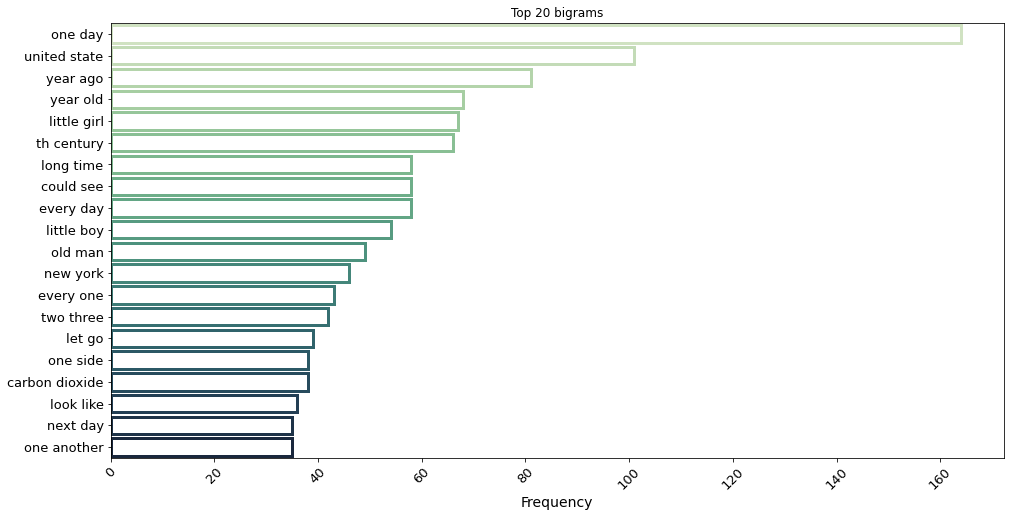

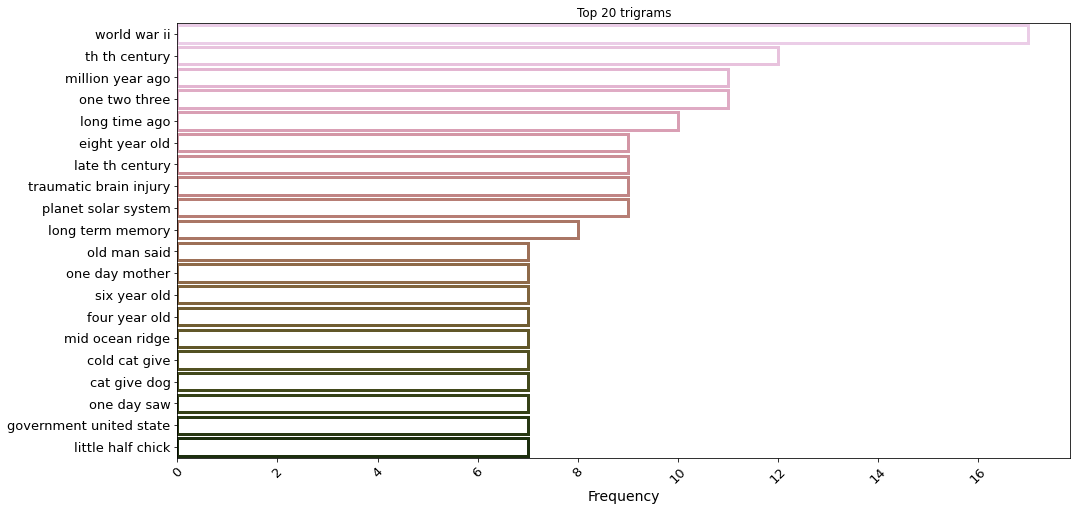

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as CV
from pandas import DataFrame
common_words = get_top_n_words(df_train_prep, 20)
common_words_df1 = DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='freq', y='word', data=common_words_df1,facecolor=(0, 0, 0, 0),linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",20))

plt.title("Top 20 unigrams")
plt.xlabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel("");

common_words_df2 = plot_bt(get_top_n_bigram,"bigrams","ch:rot=-.5")
common_words_df3 = plot_bt(get_top_n_trigram,"trigrams","ch:start=-1, rot=-.6")



#Word Cloud
Consists of the 2000 most used words in the excerpt

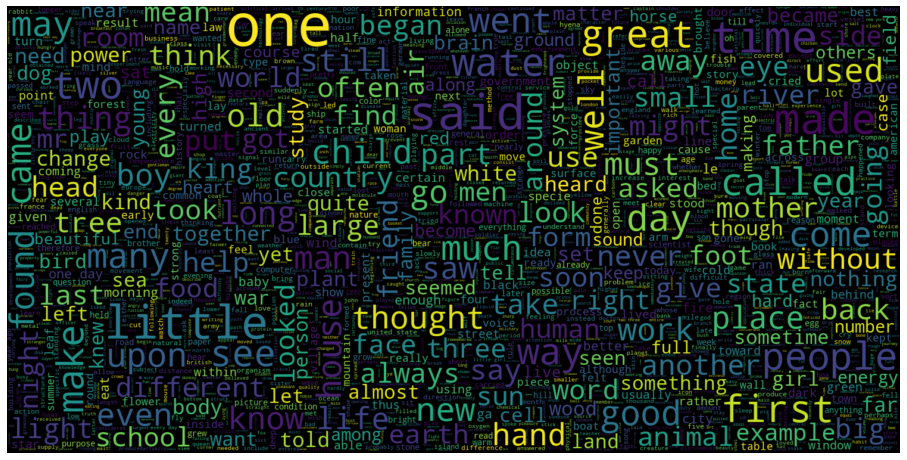

In [ ]:
# color function for the wordcloud
from wordcloud import WordCloud,STOPWORDS
plt.subplots(figsize=(16,16))
wc = WordCloud(stopwords=STOPWORDS,background_color="black",width=1500, height=750,max_words=2000, max_font_size=100)
wc.generate(' '.join(df_train_prep))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_train['excerpt']

0       When the young people returned to the ballroom...
1       All through dinner time, Mrs. Fayre was somewh...
2       As Roger had predicted, the snow departed as q...
3       And outside before the palace a great garden w...
4       Once upon a time there were Three Bears who li...
                              ...                        
2829    When you think of dinosaurs and where they liv...
2830    So what is a solid? Solids are usually hard be...
2831    The second state of matter we will discuss is ...
2832    Solids are shapes that you can actually touch....
2833    Animals are made of many cells. They eat thing...
Name: excerpt, Length: 2834, dtype: object

#EDA After Preproccesing

     |████████████████████████████████| 101 kB 9.5 MB/s 
     |████████████████████████████████| 2.0 MB 45.2 MB/s 


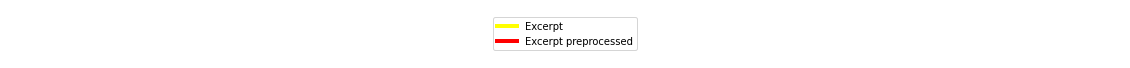

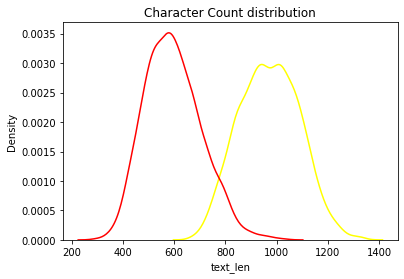

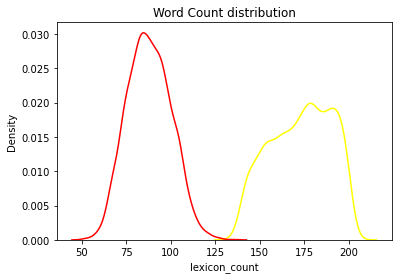

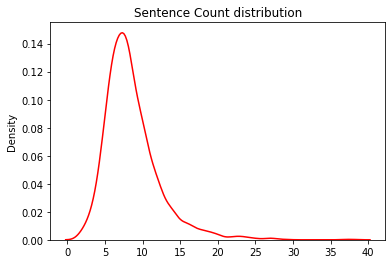

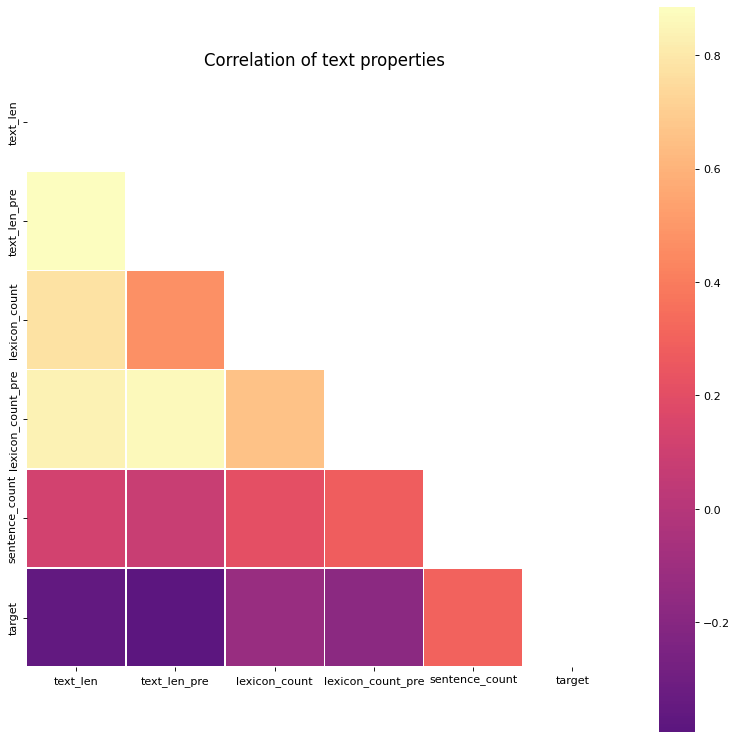

In [ ]:
!pip install textstat
import textstat
from matplotlib.lines import Line2D
text_props = df_train.copy()
text_len = df_train['excerpt'].str.len()

text_len_pre = [len(i) for i in df_train_prep]
lexicon_count = []
lexicon_count_pre = []
sentence_count = []
for i in range(len(df_train)):
    lc = textstat.lexicon_count(df_train['excerpt'][i])
    lcp = textstat.lexicon_count(df_train_prep[i])
    sc = textstat.sentence_count(df_train['excerpt'][i])
    lexicon_count.append(lc)
    lexicon_count_pre.append(lcp)
    sentence_count.append(sc)
    
text_props['text_len'] = text_len
text_props['text_len_pre'] = text_len_pre
text_props['lexicon_count'] = lexicon_count
text_props['lexicon_count_pre'] = lexicon_count_pre
text_props['sentence_count'] = sentence_count

def plot_distribution(col1,col2,title1):
    sns.kdeplot(data=text_props, x=col1,color='yellow',label="Excerpt")
    sns.kdeplot(data=text_props, x=col2,color='red',label="Excerpt preprocessed")
    plt.title(title1)
    plt.show()

custom_lines = [Line2D([0], [0], color='yellow', lw=4),Line2D([0], [0], color='red', lw=4)];
plt.figure(figsize=(20, 1));
legend = plt.legend(custom_lines, ['Excerpt', 'Excerpt preprocessed'],loc="center");
plt.axis('off')
plt.show()

plot_distribution("text_len","text_len_pre",'Character Count distribution')
plot_distribution("lexicon_count","lexicon_count_pre","Word Count distribution")
sns.kdeplot(data=text_props, x=sentence_count,color='red',label="Excerpt");
plt.title("Sentence Count distribution")
plt.show()

num_cols = ['text_len','text_len_pre','lexicon_count','lexicon_count_pre','sentence_count','target']
corr = text_props[num_cols].corr()
fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,cmap='magma', robust=True, center=0,square=True, linewidths=.5)
plt.title('Correlation of text properties', fontsize=15)
plt.show()